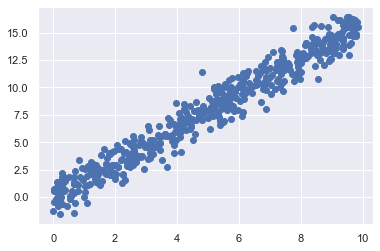

In [1]:
# Linear Regression
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

M= 512

rng = np.random.RandomState(1)
x = np.pi*np.pi * rng.rand(M)
y =  np.pi * x/2  +  0.1*np.pi*np.pi*rng.randn(M)
plt.scatter(x, y);


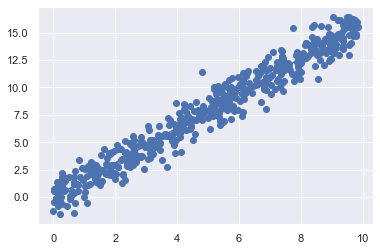

In [2]:
# Ordinary Least Squares
#\min_{w} || X w - y||_2^2

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 9, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [3]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.5889800974310064
Model intercept: -0.053741268771728024


In [4]:
rng = np.random.RandomState(1)
X =  np.pi*np.pi * rng.rand(M, 4)
y = 0.5 + np.dot(X, [np.pi, -np.pi, 1/np.pi, -1/np.pi])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999999417
[ 3.14159265 -3.14159265  0.31830989 -0.31830989]


In [5]:
# 
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [6]:
# f_n(x) = x^n

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(9),
                           LinearRegression())

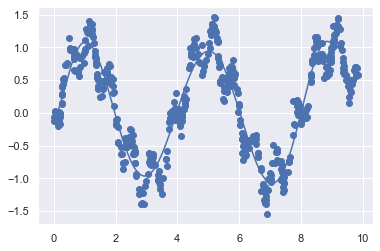

In [7]:
rng = np.random.RandomState(1)
x = np.pi*np.pi * rng.rand(M)
y = np.sin(np.pi*x/2) - np.sin(3*np.pi*x)/3 + 0.1 * rng.randn(M)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

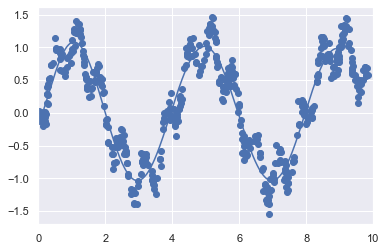

In [8]:
# Gaussian basis functions
 # p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)
    
#Radial Basis Functions We turn to a fit based on exponentiated quadratic (or Gaussian or radial) basis functions:

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(7),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

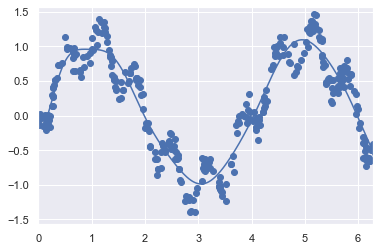

In [9]:
# Regularization

model = make_pipeline(GaussianFeatures(21),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 2*np.pi)
plt.ylim(-np.pi/2, np.pi/2);

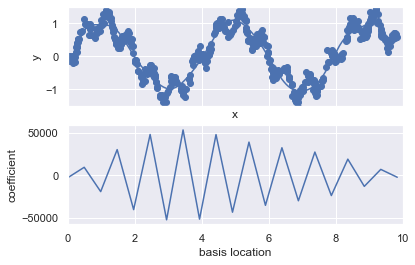

In [10]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(21), LinearRegression())
basis_plot(model)

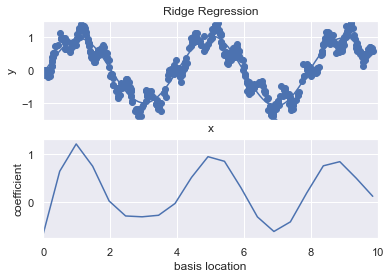

In [11]:
# Ridge regression (L2 Regularization)
# P = \alpha\sum_{n=1}^N \theta_n^2
# \min_{w} || X w - y||_2^2 + (\alpha-1) ||w||_2^2 + \alpha ||F{w}||_1^2
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(21), Ridge(alpha=0.3))
basis_plot(model, title='Ridge Regression')

C:\Users\gcast\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05151417406269587, tolerance: 0.028520734555562
  model = cd_fast.enet_coordinate_descent(


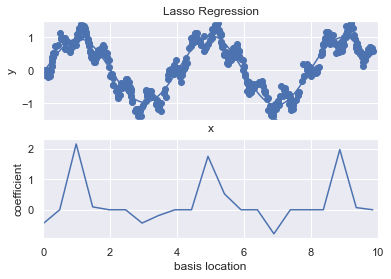

In [12]:
# Lasso regression (L1 regularization)
# P = \alpha\sum_{n=1}^N |\theta_n|

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(21), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

# https://scikit-learn.org/stable/modules/linear_model.html